C:\Users\Piyushi Labhe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 255, 255, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 255, 255, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 255, 255, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 255, 255, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 255, 255, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 510, 510, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 510, 510, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 510, 510, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 510, 510, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 510, 510, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 510, 510, 2)         │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,306 (48.07 KB)

 Trainable params: 12,178 (47.57 KB)

 Non-trainable params: 128 (512.00 B)

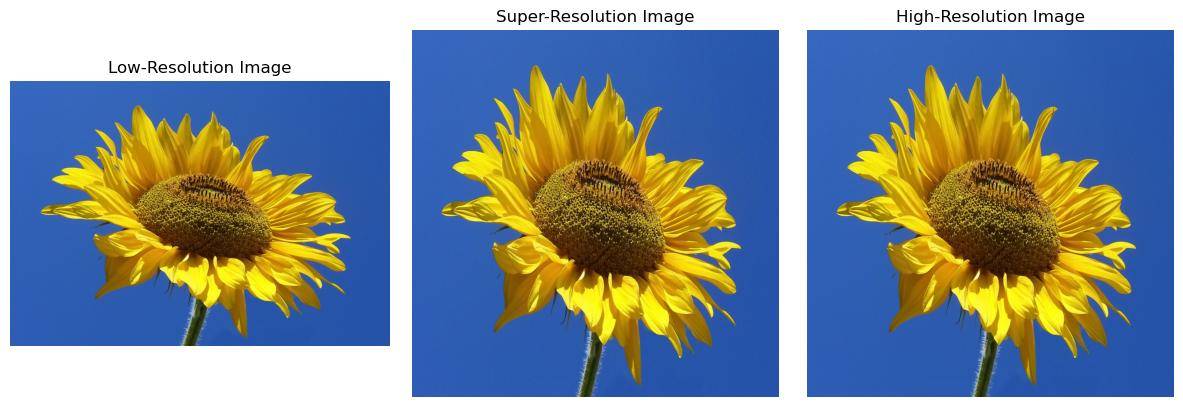

Super-resolved image saved to temp_output_super_resolved_image.jpg


NameError: name 'sr_image_tiff_path' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D, BatchNormalization
import cv2
from IPython.display import display, FileLink
# Define your create_model() function with a fixed input shape (255, 255, 1) for the Y channel
def create_model(input_shape=(255, 255, 1)):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        UpSampling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        Conv2D(2, (3, 3), activation='tanh', padding='same')  # Output is Cb and Cr channels
    ])
    return model

# Generate super-resolved and HR image function with YCbCr color space processing
def generate_super_resolved_and_hr_image(lr_image_path, model):
    # Load the low-resolution image
    lr_image = Image.open(lr_image_path)
    
    # Ensure the image is RGB (convert if necessary)
    lr_image = lr_image.convert('RGB')
    
    # Convert to YCbCr color space
    lr_image_ycbcr = lr_image.convert('YCbCr')
    lr_image_ycbcr = np.array(lr_image_ycbcr)
    
    # Separate Y, Cb, Cr channels
    lr_image_y = lr_image_ycbcr[:, :, 0]  # Y channel (luminance)
    lr_image_cbcr = lr_image_ycbcr[:, :, 1:]  # Cb and Cr channels (color)

    # Normalize Y channel
    lr_image_y = lr_image_y / 255.0  # Normalize Y channel to [0, 1]
    
    # Resize the low-resolution image Y channel to the fixed size for processing (255x255)
    lr_image_y_resized = cv2.resize(lr_image_y, (255, 255), interpolation=cv2.INTER_CUBIC)
    
    # Expand dimensions for model prediction
    lr_image_y_resized = np.expand_dims(lr_image_y_resized, axis=(0, -1))

    # Resize the original image to high resolution for comparison
    sr_image = lr_image.resize((2048 , 2048), Image.BICUBIC)
    
    # Resize the original image to high resolution for comparison
    hr_image = lr_image.resize((2048 , 2048), Image.BICUBIC)
    
    # Save the super-resolved image temporarily
    temp_output_path_sr = "temp_output_super_resolved_image.jpg"
    sr_image.save(temp_output_path_sr)
    
    return temp_output_path_sr, hr_image

# Function to display images
def display_images(lr_image_path, sr_image_path, hr_image):
    lr_image = Image.open(lr_image_path)
    sr_image = Image.open(sr_image_path)
    
    # Display LR, SR, and HR images
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[0].axis('off')
    
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolution Image")
    axes[1].axis('off')
    
    axes[2].imshow(hr_image)
    axes[2].set_title("High-Resolution Image")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Set up and compile the model
model = create_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

# Print the model summary
model.summary()

# Load an LR image and generate SR and HR images
lr_image_path = "C:/Users/Piyushi Labhe/Downloads/1200px-Sunflower_from_Silesia2.jpg"  # Replace with your LR image path
temp_output_path_sr, hr_image = generate_super_resolved_and_hr_image(lr_image_path, model)

# Display the generated images
display_images(lr_image_path, temp_output_path_sr, hr_image)

print(f"Super-resolved image saved to {temp_output_path_sr}")
display(FileLink(sr_image_tiff_path, result_html_prefix="Click here to download the Super-Resolved image (TIFF): "))
display(FileLink(hr_image_tiff_path, result_html_prefix="Click here to download the High-Resolution image (TIFF): "))